# Analyzing a Data Set
Using the data set http://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
# import packages
require(tidyverse)
require(caret)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
# Import data
header.names = c('age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race',
                 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                 'native-country', 'salary-per-year')
col.classes = c('integer', 'factor', 'integer', 'factor',
               'integer', 'factor', 'factor', 'factor',
               'factor', 'factor', 'integer', 'integer', 
               'integer', 'factor', 'factor')
training.data = read.csv(url('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'),
                     sep = ',', header = FALSE, 
                     col.names = header.names,
                     na.strings = ' ?',
                     colClasses = col.classes)
test.data = read.csv(url('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'), 
                     sep = ',', header = FALSE, skip = 1, 
                     col.names = header.names,
                     na.strings = ' ?',
                     colClasses = col.classes)
rm(header.names, col.classes)

## Explore the data and visualize and explain two interesting findings of your choice. Ideally, use R and ggplot2 for this task

In [3]:
# check data and types
str(training.data) # 32561 observations, 15 variables in accordance to data description

'data.frame':	32561 obs. of  15 variables:
 $ age            : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass      : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt         : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education      : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num  : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation     : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship   : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race           : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex            : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain   : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.

In [4]:
head(training.data)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary.per.year
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
tail(training.data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary.per.year
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
summary(training.data)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :38.58    State-gov       : 1298   Mean   : 189778  
 3rd Qu.:48.00    Self-emp-inc    : 1116   3rd Qu.: 237051  
 Max.   :90.00   (Other)          :  981   Max.   :1484705  
                 NA's             : 1836                    
         education     education.num                  marital.status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10683  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  

In [7]:
# handle missing values of factor variables as factor level
# alternatively: could have just kept ' ?' from original data set
sapply(training.data, function(x) sum(is.na(x)))

age       workclass          fnlwgt       education   education.num 
              0            1836               0               0               0 
 marital.status      occupation    relationship            race             sex 
              0            1843               0               0               0 
   capital.gain    capital.loss  hours.per.week  native.country salary.per.year 
              0               0               0             583               0

In [8]:
levels(training.data$workclass) = c(levels(training.data$workclass), 'Missing')
levels(training.data$occupation) = c(levels(training.data$occupation), 'Missing')
levels(training.data$native.country) = c(levels(training.data$native.country), 'Missing')
training.data[is.na(training.data)] = 'Missing'

In [9]:
# groupby target 'salary.per.year' and explore numeric variables
training.data %>% group_by(salary.per.year) %>%
  summarise(mean.age = mean(age), sd.age = sd(age),
            mean.education.num = mean(education.num), sd.education.num = sd(education.num),
            mean.capital.gain = mean(capital.gain), sd.capital.gain = sd(capital.gain),
            mean.capital.loss = mean(capital.loss), sd.capital.loss = sd(capital.loss),
            mean.hours.per.week = mean(hours.per.week), sd.hours.per.week = sd(hours.per.week))
# >50K group tends to: 
    # be older
    # have more education (although the data set description does not tell what education.num exactly means)
    # have more capital gain
    # work more hours per week

salary.per.year,mean.age,sd.age,mean.education.num,sd.education.num,mean.capital.gain,sd.capital.gain,mean.capital.loss,sd.capital.loss,mean.hours.per.week,sd.hours.per.week
<=50K,36.78374,14.02009,9.595065,2.436147,148.7525,963.1393,53.14292,310.7558,38.84021,12.31899
>50K,44.24984,10.51903,11.611657,2.385129,4006.1425,14570.3790,195.00153,595.4876,45.47303,11.01297


### Interesting finding 1
Plotting age and education.num with salary.per.year shows a tendency of >50K for higher values in education.num. That means education.num seems to be an especially promising predictor for yearly salary. Another observation is that education.num increases stronger when age increases for >50k than for <=50k. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


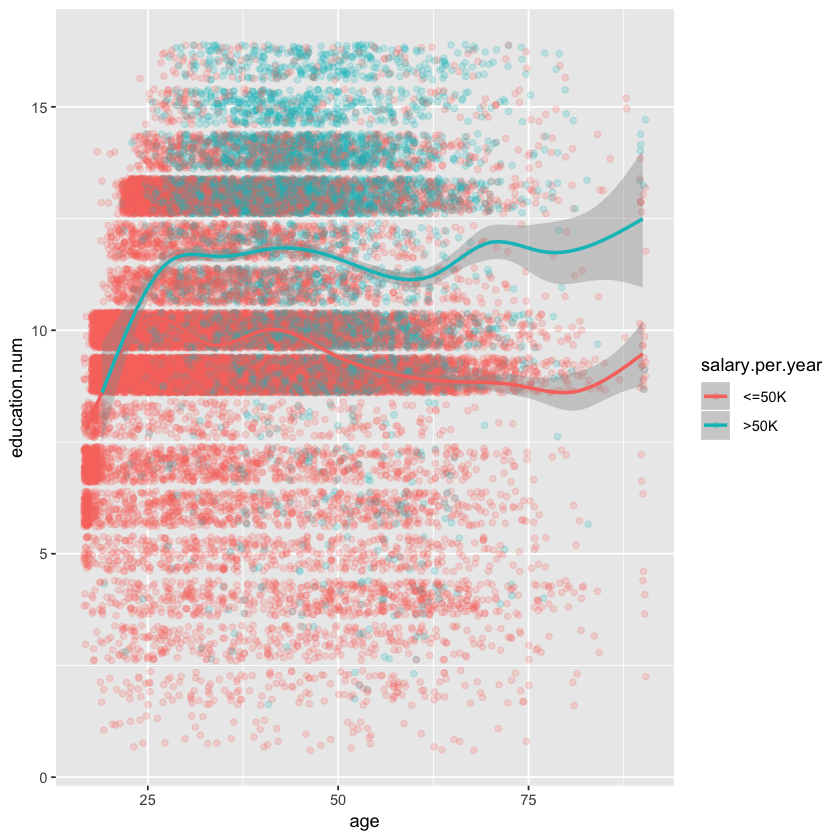

In [10]:
ggplot(training.data, aes(y = education.num, x = age, colour = salary.per.year)) + 
geom_point(alpha = 1/5, position = "jitter") +
geom_smooth()

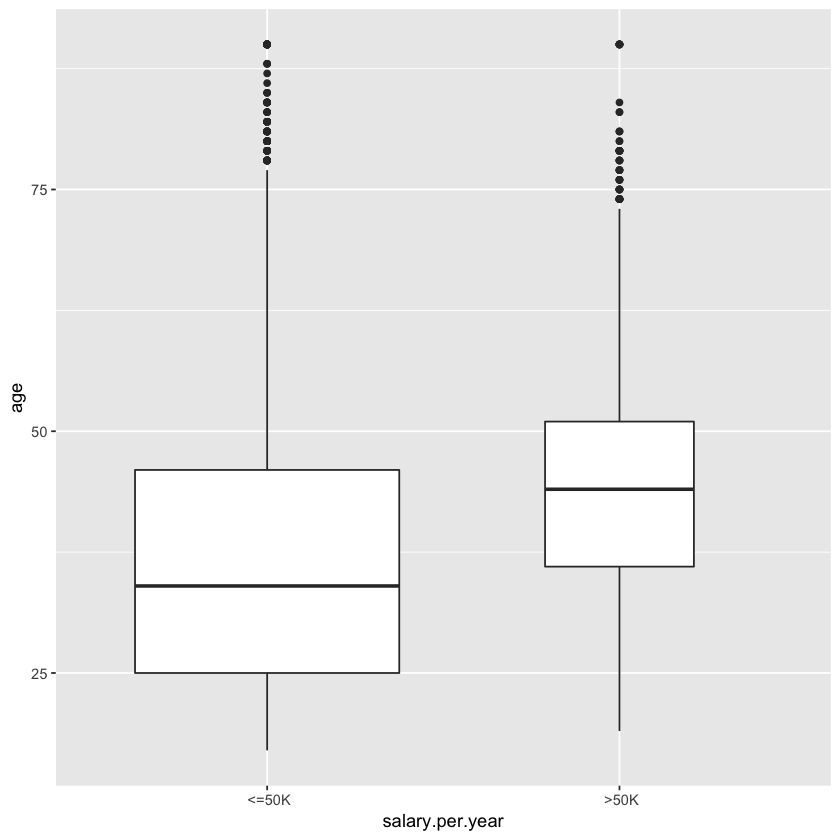

In [11]:
ggplot(training.data, aes(x = salary.per.year, y = age)) + geom_boxplot(varwidth = TRUE)

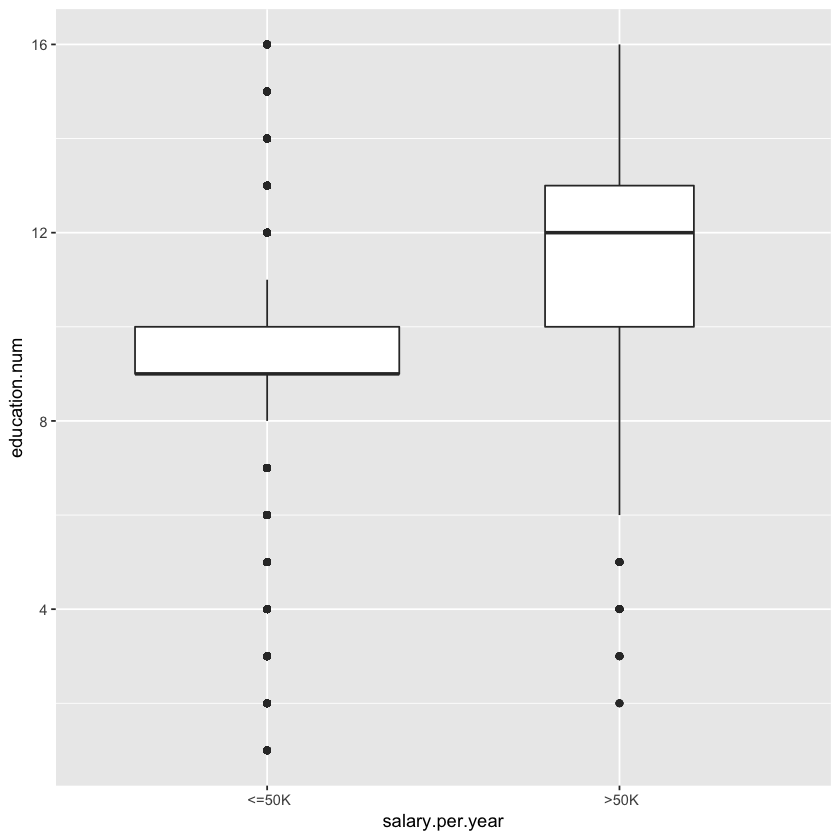

In [12]:
# create a basic box plot to illustrate the "education.num" distribution in the two groups
# it shows that the >50K group in average tends to have a higher education.num 
ggplot(training.data, aes(x = salary.per.year, y = education.num)) + geom_boxplot(varwidth = TRUE)

In [13]:
# explore factor variables
is.fact = sapply(training.data, is.factor)

for(col in training.data[, is.fact]){
    print(prop.table(table(training.data$salary.per.year, col)))
}
# >50K group tends to be more likely: (suggested by the proportions)
    # workclass self-emp-inc
    # higher educated (bachelors, masters, doctorate)
    # married
    # white
    # male

        col
          Federal-gov    Local-gov  Never-worked      Private  Self-emp-inc
   <=50K 0.0180891250 0.0453303031  0.0002149811 0.5446085808  0.0151715242
   >50K  0.0113939990 0.0189490495  0.0000000000 0.1524216087  0.0191026074
        col
          Self-emp-not-inc    State-gov  Without-pay      Missing
   <=50K      0.0558029545 0.0290224502 0.0004299622 0.0505205614
   >50K       0.0222351893 0.0108411904 0.0000000000 0.0058659132
        col
                 10th         11th         12th      1st-4th      5th-6th
   <=50K 0.0267497927 0.0342434200 0.0122846350 0.0049752772 0.0097355732
   >50K  0.0019041184 0.0018426952 0.0010134824 0.0001842695 0.0004913854
        col
              7th-8th          9th   Assoc-acdm    Assoc-voc    Bachelors
   <=50K 0.0186112220 0.0149565431 0.0246306932 0.0313565308 0.0962501152
   >50K  0.0012284635 0.0008292129 0.0081385707 0.0110868831 0.0682104358
        col
            Doctorate      HS-grad      Masters    Preschool  Prof-sch

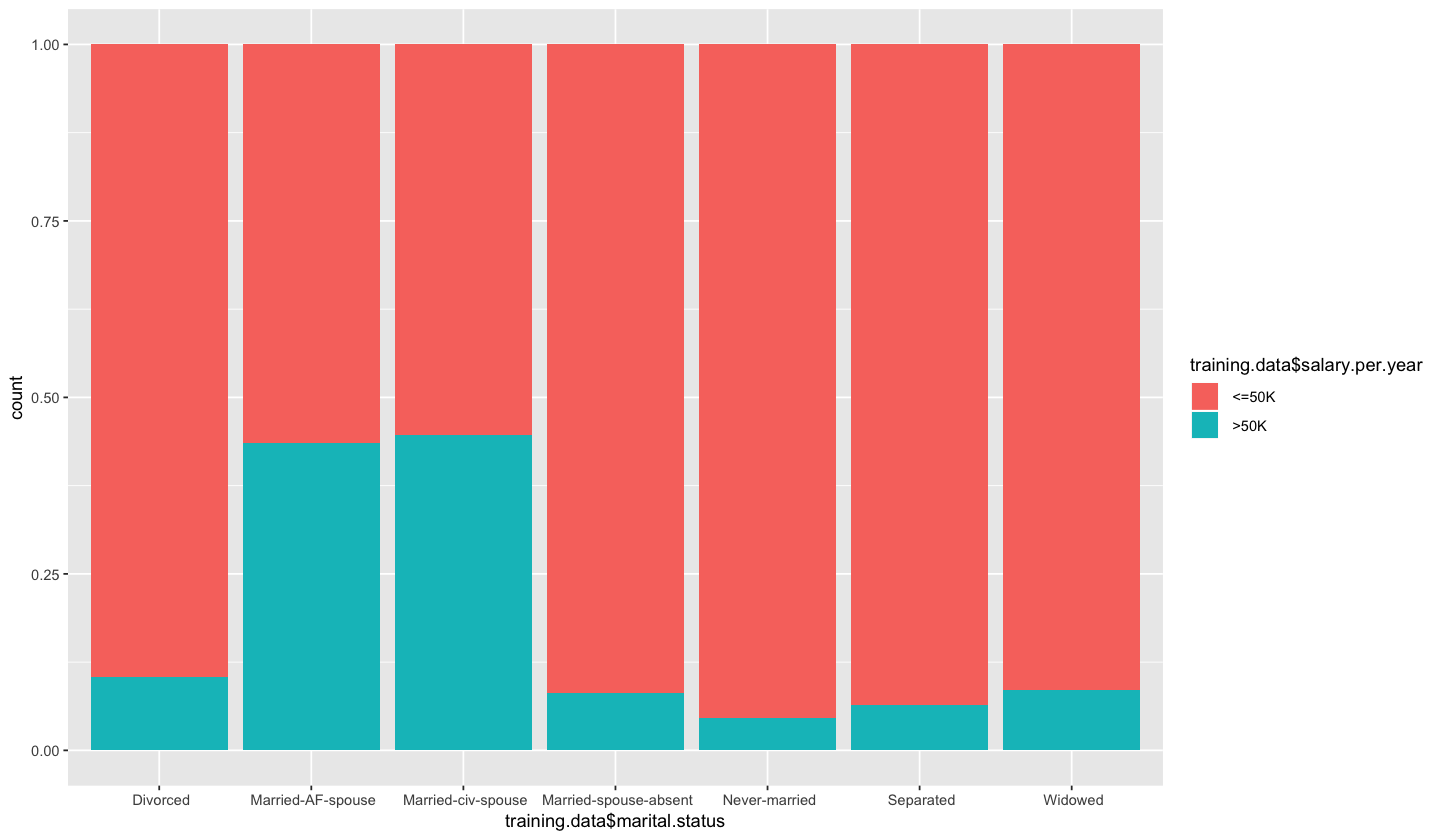

In [14]:
options(repr.plot.width=12, repr.plot.height=7)
ggplot(data = training.data) +
geom_bar(mapping = aes(x = training.data$marital.status, fill = training.data$salary.per.year),
        position = "fill")

### Interesting finding 2
Plotting the hours per week per sex suggests that the lower number of females in >50K may be partly related to a lower number of hours per week of females.

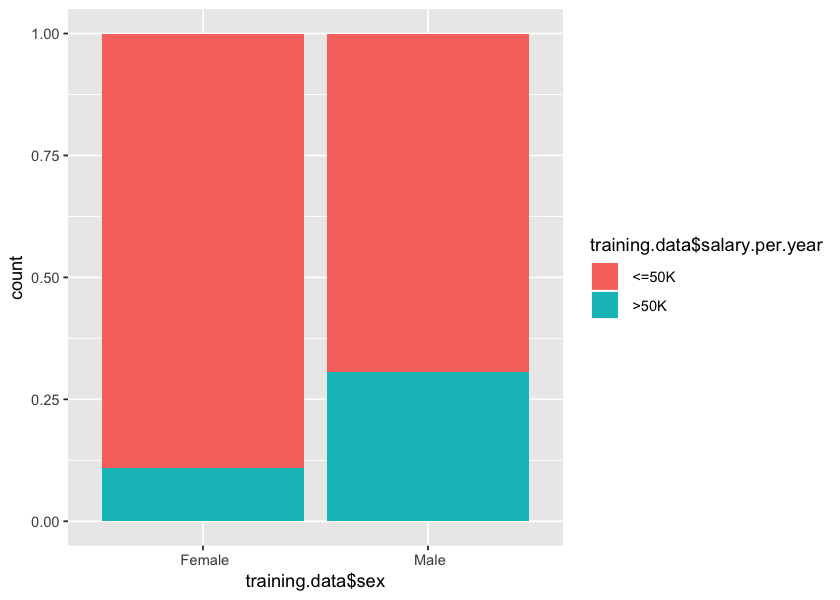

In [15]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(data = training.data) +
geom_bar(mapping = aes(x = training.data$sex, fill = training.data$salary.per.year),
        position = "fill")

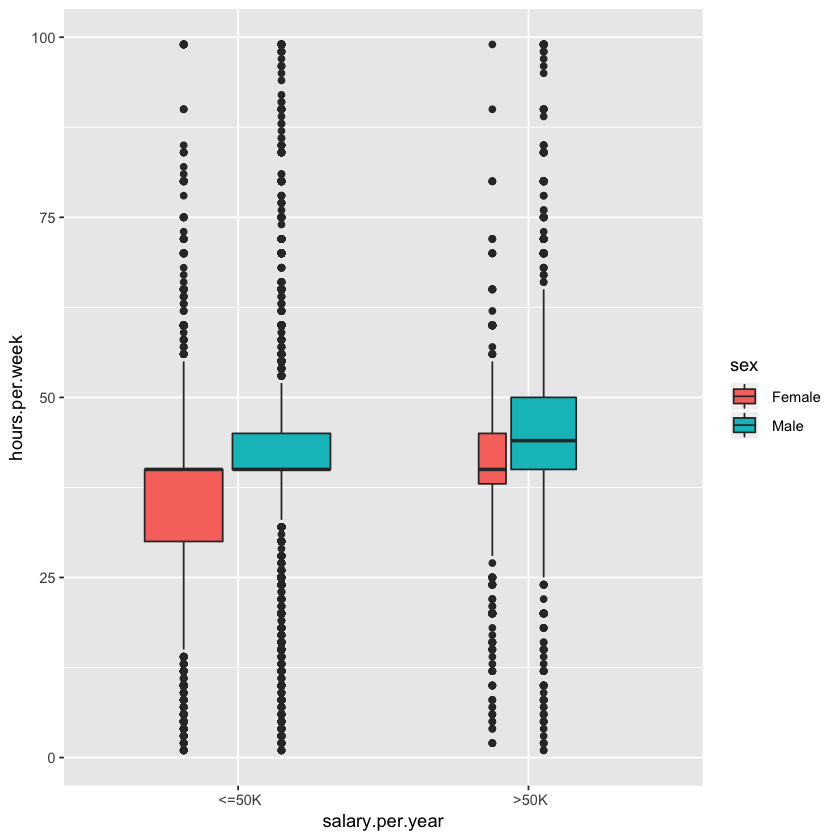

In [16]:
# plotting the hours per week for salary.per.year and sex
options(repr.plot.width=7, repr.plot.height=7)
ggplot(training.data, aes(x = salary.per.year, y = hours.per.week, fill = sex)) + 
geom_boxplot(varwidth = TRUE)

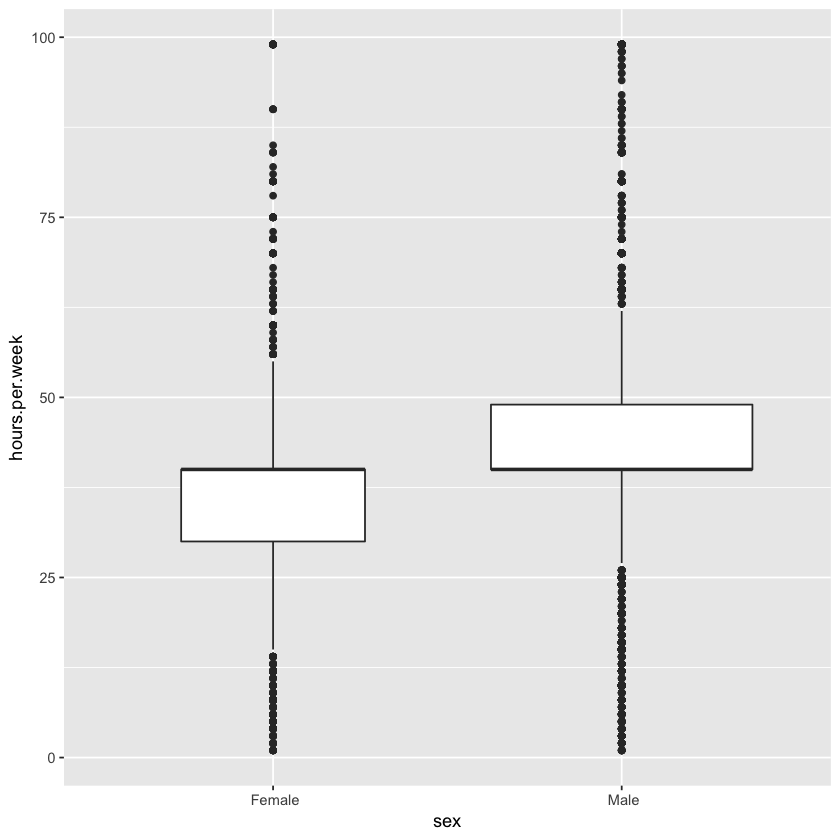

In [17]:
ggplot(training.data, aes(x = sex, y = hours.per.week)) + geom_boxplot(varwidth = TRUE)

## Build a linear model to predict whether a person makes over 50K a year

In [18]:
# prepare and check test.data
levels(test.data$workclass) = c(levels(test.data$workclass), 'Missing')
levels(test.data$occupation) = c(levels(test.data$occupation), 'Missing')
levels(test.data$native.country) = c(levels(test.data$native.country), 'Missing')
test.data[is.na(test.data)] = 'Missing'

levels(test.data$salary.per.year) = c(" <=50K", " >50K")

In [19]:
str(test.data)

'data.frame':	16281 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : Factor w/ 9 levels " Federal-gov",..: 4 4 2 4 9 4 9 6 4 4 ...
 $ fnlwgt         : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : Factor w/ 16 levels " 10th"," 11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ education.num  : int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital.status : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation     : Factor w/ 15 levels " Adm-clerical",..: 7 5 11 7 15 8 15 10 8 3 ...
 $ relationship   : Factor w/ 6 levels " Husband"," Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race           : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ sex            : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ capital.gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital.loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.wee

In [20]:
set.seed(42)
# fit a simple linear model with the variables indicated as interesting in the exploration above
lm = train(salary.per.year ~ age+workclass+education.num+marital.status+sex+hours.per.week, 
           data = training.data, method = "glm")

In [21]:
lm
# accuracy of 82.44% in the training data

Generalized Linear Model 

32561 samples
    6 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32561, 32561, 32561, 32561, 32561, 32561, ... 
Resampling results:

  Accuracy   Kappa    
  0.8243958  0.4760706


In [22]:
summary(lm)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8255  -0.5728  -0.2568  -0.0637   3.5836  

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -8.551607   0.164538 -51.974  < 2e-16
age                                      0.031409   0.001470  21.372  < 2e-16
`workclass Local-gov`                   -0.602846   0.101131  -5.961 2.51e-09
`workclass Never-worked`               -10.557057 168.134934  -0.063  0.94993
`workclass Private`                     -0.489799   0.084881  -5.770 7.91e-09
`workclass Self-emp-inc`                -0.052179   0.111374  -0.468  0.63943
`workclass Self-emp-not-inc`            -1.004837   0.098301 -10.222  < 2e-16
`workclass State-gov`                   -0.749727   0.114845  -6.528 6.66e-11
`workclass Without-pay`                -13.130364 116.602123  -0.113  0.91034
workclassMissing                        -1.318734   0.124772 -10.569  < 2e-16
e

In [23]:
predictions_lm = predict(lm, newdata = test.data)
summary(predictions_lm)

<=50K   >50K 
 13379   2902

In [24]:
confusionMatrix(predictions_lm, test.data$salary.per.year)
# accuracy of 82.69% in the test data

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K  11498  1881
     >50K     937  1965
                                         
               Accuracy : 0.8269         
                 95% CI : (0.821, 0.8327)
    No Information Rate : 0.7638         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4759         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9246         
            Specificity : 0.5109         
         Pos Pred Value : 0.8594         
         Neg Pred Value : 0.6771         
             Prevalence : 0.7638         
         Detection Rate : 0.7062         
   Detection Prevalence : 0.8218         
      Balanced Accuracy : 0.7178         
                                         
       'Positive' Class :  <=50K         
                                         

## Bonus 1: Use any another model type o predict wether a person makes over 50K a year

In [25]:
set.seed(42)
# fit a simple random forest model to the data
rf = train(salary.per.year ~ age+workclass+education.num+marital.status+sex+hours.per.week, 
           data = training.data, method = "rf")

In [26]:
rf

Random Forest 

32561 samples
    6 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32561, 32561, 32561, 32561, 32561, 32561, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8134880  0.3650039
  10    0.8156417  0.4720573
  18    0.7996829  0.4319698

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

In [27]:
summary(rf)

                Length Class      Mode     
call                4  -none-     call     
type                1  -none-     character
predicted       32561  factor     numeric  
err.rate         1500  -none-     numeric  
confusion           6  -none-     numeric  
votes           65122  matrix     numeric  
oob.times       32561  -none-     numeric  
classes             2  -none-     character
importance         18  -none-     numeric  
importanceSD        0  -none-     NULL     
localImportance     0  -none-     NULL     
proximity           0  -none-     NULL     
ntree               1  -none-     numeric  
mtry                1  -none-     numeric  
forest             14  -none-     list     
y               32561  factor     numeric  
test                0  -none-     NULL     
inbag               0  -none-     NULL     
xNames             18  -none-     character
problemType         1  -none-     character
tuneValue           1  data.frame list     
obsLevels           2  -none-   

In [28]:
predictions_rf = predict(rf, newdata = test.data)
summary(predictions_rf)

<=50K   >50K 
 13109   3172

In [29]:
confusionMatrix(predictions_rf, test.data$salary.per.year)

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K  11324  1785
     >50K    1111  2061
                                         
               Accuracy : 0.8221         
                 95% CI : (0.8162, 0.828)
    No Information Rate : 0.7638         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4753         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9107         
            Specificity : 0.5359         
         Pos Pred Value : 0.8638         
         Neg Pred Value : 0.6497         
             Prevalence : 0.7638         
         Detection Rate : 0.6955         
   Detection Prevalence : 0.8052         
      Balanced Accuracy : 0.7233         
                                         
       'Positive' Class :  <=50K         
                                         

## Bonus 2: Implement an application in Shiny to show the distribution of age by marital-status, meaning the user can pick one marital-status from a list and get the distribution of age for that characteristic.

See separate code file app.R